In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Credit: scikit-learn

classif_rate for L1 logistic : 79.333333 
classif_rate for L2 logistic : 76.666667 
classif_rate for Linear SVC : 82.000000 


/home/jeff/src/jma/talks/2015-11__ML/venv/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


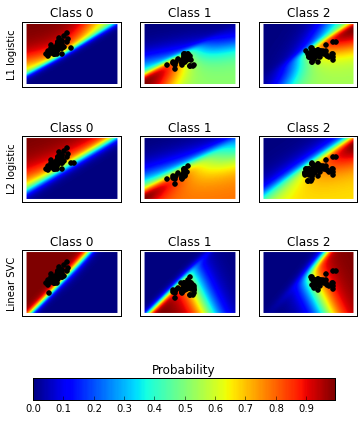

In [2]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
# We only take the first two features for visualization.
X = iris.data[:, 0:2]
y = iris.target

n_features = X.shape[1]

C = 1.0

# Create different classifiers. The logistic regression cannot do
# multiclass out of the box.
classifiers = {'L1 logistic': LogisticRegression(C=C, penalty='l1'),
               'L2 logistic': LogisticRegression(C=C, penalty='l2'),
               'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                                 random_state=0)}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
    print("classif_rate for %s : %f " % (name, classif_rate))

    # View probabilities=
    xx = np.linspace(3, 9, 100)
    yy = np.linspace(1, 5, 100).T
    xx, yy = np.meshgrid(xx, yy)
    Xfull = np.c_[xx.ravel(), yy.ravel()]
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()